# Nearest neighbor grids of $m$ non-emission zones (NNG)
背景值新计算方法测试

In [1]:
# 检验非排放区
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.basemap import Basemap

china_shp_path = ("H:\\Region\\区划\\省", "省")  # 中国陆地轮廓
nine_shp_path = ("H:\\Region\\全国shp\\最新2021年全国行政区划\\九段线", "九段线")  # 九段线

In [2]:
odiac = np.array([np.load(f"H:\\CO2\\ODIAC\\2022\\year\\ODIAC_{year}.npy") for year in range(2014, 2020)])

In [3]:
odiac.shape

(6, 180, 360)

In [4]:
odiac_mean = odiac.mean(axis=0)
odiac_mean.shape

(180, 360)

In [5]:
from maplot import *
china_area = np.load("china_area.npy")

H:\preprocessing_code\XCO2\NNG\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


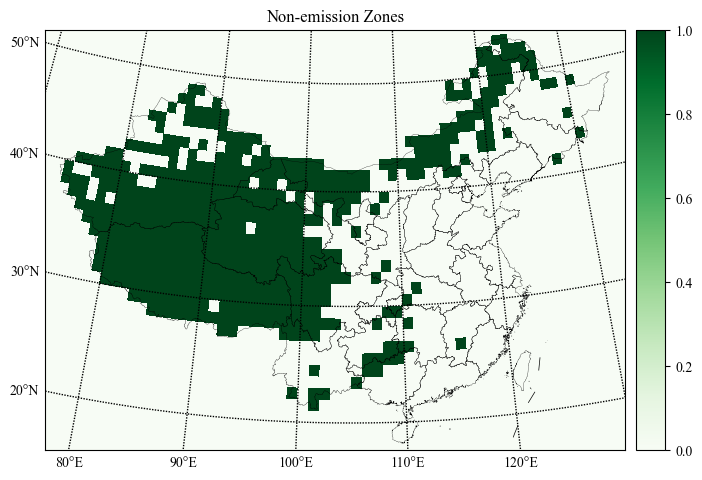

In [6]:
odiac_mean[china_area==0.0] = np.NaN  # 非中国区域
map_plot_surface(odiac_mean<0.1, "Greens", None, None, "Non-emission Zones", figsize=(8, 8))

In [7]:
non_emi = odiac_mean < 0.1

In [17]:
length = non_emi.sum()
length

503

In [9]:
longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5, 89.5, 180)
lon, lat = np.meshgrid(longitude, latitude)

In [10]:
lon

array([[-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       ...,
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5]])

In [11]:
lat

array([[-89.5, -89.5, -89.5, ..., -89.5, -89.5, -89.5],
       [-88.5, -88.5, -88.5, ..., -88.5, -88.5, -88.5],
       [-87.5, -87.5, -87.5, ..., -87.5, -87.5, -87.5],
       ...,
       [ 87.5,  87.5,  87.5, ...,  87.5,  87.5,  87.5],
       [ 88.5,  88.5,  88.5, ...,  88.5,  88.5,  88.5],
       [ 89.5,  89.5,  89.5, ...,  89.5,  89.5,  89.5]])

In [12]:
coordinates = np.array([lon[non_emi], lat[non_emi]]).T
coordinates

array([[101.5,  21.5],
       [ 99.5,  22.5],
       [101.5,  22.5],
       ...,
       [125.5,  52.5],
       [122.5,  53.5],
       [123.5,  53.5]])

In [13]:
from pyproj import Geod
geod = Geod(ellps="WGS84")

In [14]:
geod.inv(0.0, 0.0, 1.0, 1.0)[2]

156899.56829134026

In [15]:
def distance(lon1, lat1, lon2, lat2):
    return geod.inv(lon1, lat1, lon2, lat2)[2]

In [18]:
# 寻找距离排放点源最近的非排放区坐标序列
def find_nearest(lon0, lat0):
    distances = distance(np.ones(length)*lon0, np.ones(length)*lat0, coordinates[:, 0], coordinates[:, 1])
    indices = np.argsort(distances)
    return indices

In [19]:
geod.inv(np.array([0.0, 0.0]), np.array([0.0, 0.0]), np.array([1.0, 4.0]), np.array([1.0, 3.0]))[2]

array([156899.56829134, 555098.58969089])

In [20]:
# 先求出对国内所有像元的最近非排放区下标序列
nearestSeq = np.full((180, 360, length), np.NaN)
for la in range(0, 180):
    for lo in range(0, 360):
        if china_area[la, lo] > 0.0:
            nearestSeq[la, lo] = find_nearest(lo-179.5, la-89.5)
            print(lo-179.5, la-89.5, la, lo)

109.5 18.5 108 289
109.5 19.5 109 289
110.5 19.5 109 290
100.5 21.5 111 280
101.5 21.5 111 281
108.5 21.5 111 288
109.5 21.5 111 289
110.5 21.5 111 290
111.5 21.5 111 291
99.5 22.5 112 279
100.5 22.5 112 280
101.5 22.5 112 281
102.5 22.5 112 282
107.5 22.5 112 287
108.5 22.5 112 288
109.5 22.5 112 289
110.5 22.5 112 290
111.5 22.5 112 291
112.5 22.5 112 292
113.5 22.5 112 293
114.5 22.5 112 294
120.5 22.5 112 300
99.5 23.5 113 279
100.5 23.5 113 280
101.5 23.5 113 281
102.5 23.5 113 282
103.5 23.5 113 283
104.5 23.5 113 284
105.5 23.5 113 285
106.5 23.5 113 286
107.5 23.5 113 287
108.5 23.5 113 288
109.5 23.5 113 289
110.5 23.5 113 290
111.5 23.5 113 291
112.5 23.5 113 292
113.5 23.5 113 293
114.5 23.5 113 294
115.5 23.5 113 295
116.5 23.5 113 296
120.5 23.5 113 300
121.5 23.5 113 301
98.5 24.5 114 278
99.5 24.5 114 279
100.5 24.5 114 280
101.5 24.5 114 281
102.5 24.5 114 282
103.5 24.5 114 283
104.5 24.5 114 284
105.5 24.5 114 285
106.5 24.5 114 286
107.5 24.5 114 287
108.5 24.5 114 2

In [21]:
nearestSeq[109, 289]

array([  7.,   4.,   6.,  11.,  10.,   9.,   8.,  13.,  14.,  12.,   3.,
         0.,   2.,  15.,   5.,  42.,  41.,   1.,  62.,  61.,  40.,  21.,
        86.,  39.,  20.,  38., 111.,  19.,  37.,  60.,  85.,  36.,  18.,
        59., 138.,  84.,  35.,  58., 110.,  83., 137., 109., 164., 136.,
        57.,  34.,  82., 135., 108.,  56.,  81., 134.,  33., 163., 107.,
       133., 162.,  80.,  55., 106.,  32., 161., 132., 190.,  79., 160.,
       105.,  54., 189., 131.,  31., 188., 159.,  17., 104.,  78., 130.,
        53., 187., 158.,  30., 239., 103., 186., 129., 215.,  77.,  16.,
       157.,  52., 214., 185.,  29., 128., 102., 156.,  76., 213., 184.,
        51., 212., 127., 265.,  28., 155., 101., 183.,  75., 294., 238.,
       211., 264., 126., 154., 100., 293., 182., 237.,  27., 263.,  74.,
       292., 210.,  50., 236., 262., 321., 153., 125., 181.,  99., 291.,
       209., 320.,  26., 261.,  73., 319., 235., 318., 152., 180., 124.,
        49., 208., 260., 317., 290.,  98., 234., 35

In [22]:
(nearestSeq > length-1).sum()

0

In [23]:
# 从MappingXCO2月份版做，先做5、10、15三个版本
import os
from copy import deepcopy
def dxco2_gen(m):
    inPath = "H:\\XCO2\\MappingXCO2\\MappingXCO2_month_npy"
    outPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_{m}_month"
    if not os.path.exists(outPath):
        os.mkdir(outPath)
    temp_nearest = deepcopy(nearestSeq[:, :, :m])  # 现在代表在152序列中的下标
    for year in range(2010, 2021):
        for month in range(1, 13):
            bkg = np.full((180, 360), np.NaN)
            xco2 = np.load(inPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy")
            non_emi_xco2 = xco2[non_emi]  # 提取：长度152非排放区XCO2
            for la in range(180):
                for lo in range(360):
                    if china_area[la, lo] > 0.0:
                        bkg[la, lo] = non_emi_xco2[temp_nearest[la, lo].astype(int)].mean()  # 求背景值
            dxco2 = xco2 - bkg
            np.save(outPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy", dxco2)
            print(f"NGG_{m}  MappingXCO2_{year}{str(month).zfill(2)}.npy  Succeed.")

dxco2_gen(5)

NGG_5  MappingXCO2_201001.npy  Succeed.
NGG_5  MappingXCO2_201002.npy  Succeed.
NGG_5  MappingXCO2_201003.npy  Succeed.
NGG_5  MappingXCO2_201004.npy  Succeed.
NGG_5  MappingXCO2_201005.npy  Succeed.
NGG_5  MappingXCO2_201006.npy  Succeed.
NGG_5  MappingXCO2_201007.npy  Succeed.
NGG_5  MappingXCO2_201008.npy  Succeed.
NGG_5  MappingXCO2_201009.npy  Succeed.
NGG_5  MappingXCO2_201010.npy  Succeed.
NGG_5  MappingXCO2_201011.npy  Succeed.
NGG_5  MappingXCO2_201012.npy  Succeed.
NGG_5  MappingXCO2_201101.npy  Succeed.
NGG_5  MappingXCO2_201102.npy  Succeed.
NGG_5  MappingXCO2_201103.npy  Succeed.
NGG_5  MappingXCO2_201104.npy  Succeed.
NGG_5  MappingXCO2_201105.npy  Succeed.
NGG_5  MappingXCO2_201106.npy  Succeed.
NGG_5  MappingXCO2_201107.npy  Succeed.
NGG_5  MappingXCO2_201108.npy  Succeed.
NGG_5  MappingXCO2_201109.npy  Succeed.
NGG_5  MappingXCO2_201110.npy  Succeed.
NGG_5  MappingXCO2_201111.npy  Succeed.
NGG_5  MappingXCO2_201112.npy  Succeed.
NGG_5  MappingXCO2_201201.npy  Succeed.


H:\preprocessing_code\XCO2\NNG\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


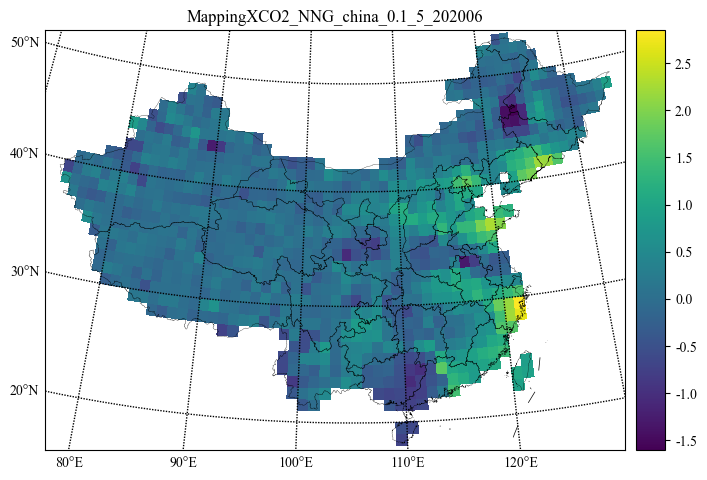

In [24]:
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_5_month\\MappingXCO2_202006.npy"),
                 "viridis", None, None, "MappingXCO2_NNG_china_0.1_5_202006", figsize=(8, 8))

In [25]:
# 生成年
def dxco2_year_gen(m):
    inPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_{m}_month"
    outPath = f"H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_{m}_year"
    if not os.path.exists(outPath):
        os.mkdir(outPath)
    for year in range(2010, 2021):
        data_months = np.array([np.load(inPath + "\\" + f"MappingXCO2_{year}{str(month).zfill(2)}.npy") for month in range(1, 13)])
        data_year = data_months.mean(axis=0)
        np.save(outPath + "\\" + f"MappingXCO2_{year}", data_year)
        print(f"NNG_{m}  {year}  Succeed.")

In [26]:
dxco2_year_gen(5)

NNG_5  2010  Succeed.
NNG_5  2011  Succeed.
NNG_5  2012  Succeed.
NNG_5  2013  Succeed.
NNG_5  2014  Succeed.
NNG_5  2015  Succeed.
NNG_5  2016  Succeed.
NNG_5  2017  Succeed.
NNG_5  2018  Succeed.
NNG_5  2019  Succeed.
NNG_5  2020  Succeed.


H:\preprocessing_code\XCO2\NNG\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


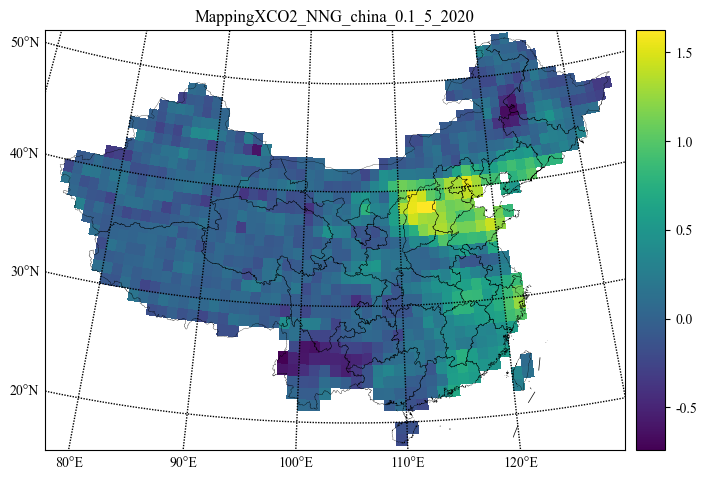

In [32]:
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_5_year\\MappingXCO2_2020.npy"),
                 "viridis", None, None, "MappingXCO2_NNG_china_0.1_5_2020", figsize=(8, 8))

In [28]:
dxco2_gen(10)
dxco2_year_gen(10)

NGG_10  MappingXCO2_201001.npy  Succeed.
NGG_10  MappingXCO2_201002.npy  Succeed.
NGG_10  MappingXCO2_201003.npy  Succeed.
NGG_10  MappingXCO2_201004.npy  Succeed.
NGG_10  MappingXCO2_201005.npy  Succeed.
NGG_10  MappingXCO2_201006.npy  Succeed.
NGG_10  MappingXCO2_201007.npy  Succeed.
NGG_10  MappingXCO2_201008.npy  Succeed.
NGG_10  MappingXCO2_201009.npy  Succeed.
NGG_10  MappingXCO2_201010.npy  Succeed.
NGG_10  MappingXCO2_201011.npy  Succeed.
NGG_10  MappingXCO2_201012.npy  Succeed.
NGG_10  MappingXCO2_201101.npy  Succeed.
NGG_10  MappingXCO2_201102.npy  Succeed.
NGG_10  MappingXCO2_201103.npy  Succeed.
NGG_10  MappingXCO2_201104.npy  Succeed.
NGG_10  MappingXCO2_201105.npy  Succeed.
NGG_10  MappingXCO2_201106.npy  Succeed.
NGG_10  MappingXCO2_201107.npy  Succeed.
NGG_10  MappingXCO2_201108.npy  Succeed.
NGG_10  MappingXCO2_201109.npy  Succeed.
NGG_10  MappingXCO2_201110.npy  Succeed.
NGG_10  MappingXCO2_201111.npy  Succeed.
NGG_10  MappingXCO2_201112.npy  Succeed.
NGG_10  MappingX

H:\preprocessing_code\XCO2\NNG\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


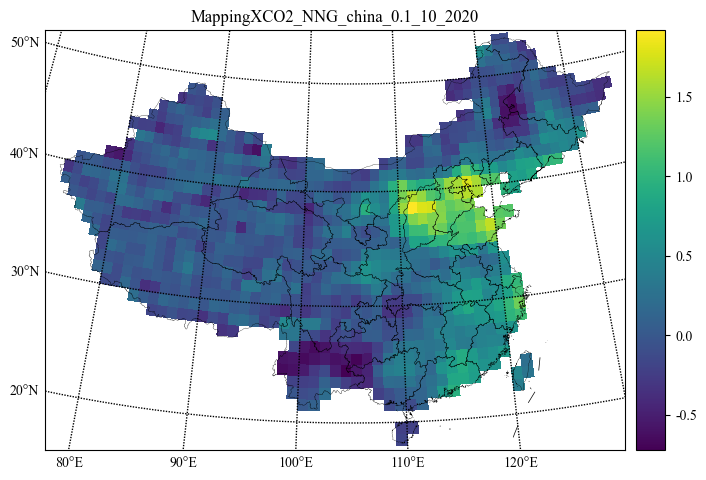

In [31]:
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_10_year\\MappingXCO2_2020.npy"),
                 "viridis", None, None, "MappingXCO2_NNG_china_0.1_10_2020", figsize=(8, 8))

In [33]:
dxco2_gen(15)
dxco2_year_gen(15)

NGG_15  MappingXCO2_201001.npy  Succeed.
NGG_15  MappingXCO2_201002.npy  Succeed.
NGG_15  MappingXCO2_201003.npy  Succeed.
NGG_15  MappingXCO2_201004.npy  Succeed.
NGG_15  MappingXCO2_201005.npy  Succeed.
NGG_15  MappingXCO2_201006.npy  Succeed.
NGG_15  MappingXCO2_201007.npy  Succeed.
NGG_15  MappingXCO2_201008.npy  Succeed.
NGG_15  MappingXCO2_201009.npy  Succeed.
NGG_15  MappingXCO2_201010.npy  Succeed.
NGG_15  MappingXCO2_201011.npy  Succeed.
NGG_15  MappingXCO2_201012.npy  Succeed.
NGG_15  MappingXCO2_201101.npy  Succeed.
NGG_15  MappingXCO2_201102.npy  Succeed.
NGG_15  MappingXCO2_201103.npy  Succeed.
NGG_15  MappingXCO2_201104.npy  Succeed.
NGG_15  MappingXCO2_201105.npy  Succeed.
NGG_15  MappingXCO2_201106.npy  Succeed.
NGG_15  MappingXCO2_201107.npy  Succeed.
NGG_15  MappingXCO2_201108.npy  Succeed.
NGG_15  MappingXCO2_201109.npy  Succeed.
NGG_15  MappingXCO2_201110.npy  Succeed.
NGG_15  MappingXCO2_201111.npy  Succeed.
NGG_15  MappingXCO2_201112.npy  Succeed.
NGG_15  MappingX

H:\preprocessing_code\XCO2\NNG\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax)


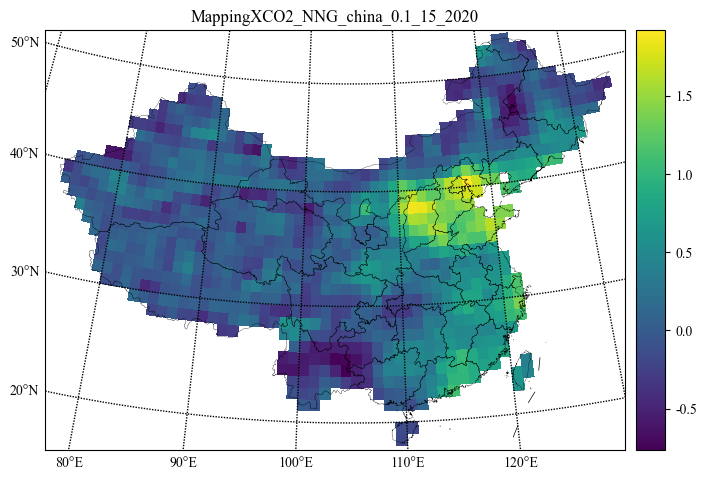

In [34]:
# 绘制检验
map_plot_surface(np.load("H:\\XCO2\\MappingXCO2\\MappingXCO2_NNG_china_0.1_15_year\\MappingXCO2_2020.npy"),
                 "viridis", None, None, "MappingXCO2_NNG_china_0.1_15_2020", figsize=(8, 8))